# DDA 묘사적 데이터 분석
1. 비즈니스 파악 및 추진배경 수립
2. 데이터 셋 이해
3. 데이터 전처리
4. 데이터 통합

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

### 참고. dataset명을 확인하고 쉽게 가져오는 방법

In [3]:
import os

In [4]:
# 작업중인 폴더의 경로 확인
path = os.getcwd()
path

'/Users/eunne/projects/Machine_Learning/반도체_데이터셋'

In [5]:
# 작업중인 폴더에 있는 데이터파일을 쉽게 확인 가능하다.
os.listdir()

['Oxid_000.csv',
 'Photo_lithography_000.csv',
 'Photo_Softbake_000.csv',
 'Data analysis for Semiconductor_Class101_231227.ipynb',
 'Etching_000.csv',
 '.ipynb_checkpoints',
 'Implant_000.csv',
 'image_oxdation.png',
 'Inspect_000.csv']

In [6]:
name_list = os.listdir(path) #해당 폴더 내 모든 파일 확인

In [7]:
# 파일에 csv가 항목만 골라낸다.

for i in name_list:
    if 'csv' in i:
        print(i)

Oxid_000.csv
Photo_lithography_000.csv
Photo_Softbake_000.csv
Etching_000.csv
Implant_000.csv
Inspect_000.csv


In [8]:
df1_oxdi = pd.read_csv('Oxid_000.csv')

In [9]:
df1_oxdi

,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,No_Die,Lot_Num,Wafer_Num,Datetime
0,1,Oxidation,dry,1138.979159,O2,32.80,0.200,62,699.443,NOLSM111,1,1,17-02-2019 PM 9:04:30
1,1,Oxidation,dry,1218.184551,O2,31.86,0.194,137,696.792,NOLSM212,1,2,17-02-2019 PM 9:04:30
2,1,Oxidation,dry,1062.467808,O2,39.51,0.217,128,705.471,NOLSM313,1,3,17-02-2019 PM 9:04:30
3,1,Oxidation,dry,1114.704773,O2,32.88,0.201,90,710.772,NOLSM414,1,4,17-02-2019 PM 9:04:30
4,1,Oxidation,dry,989.411946,O2,38.11,0.204,98,716.975,NOLSM515,1,5,17-02-2019 PM 9:04:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,3,Oxidation,wet,1275.182502,H2O,45.10,0.214,21,715.498,NOLSM8483211,32,11,17-02-2019 PM 9:04:30
848,1,Oxidation,wet,1268.105427,H2O,45.07,0.215,22,707.179,NOLSM8493212,32,12,17-02-2019 PM 9:04:30
849,1,Oxidation,wet,1279.160563,H2O,45.12,0.214,21,712.946,NOLSM8503213,32,13,17-02-2019 PM 9:04:30
850,1,Oxidation,wet,1272.804948,H2O,45.34,0.213,20,711.987,NOLSM8513214,32,14,17-02-2019 PM 9:04:30


# 2. 데이터 셋 이해하기

# 데이터셋을 가져오면 확인해야 할 3가지


- 데이터 구조: 데이터의 개수 / 항목
- 데이터 타입: 각 항목의 데이터 타입 (연속형 / 범주형) - 숫자데이터인지, 문자데이터인지에 따라 다름
- 기술 통계량:
    - 연속형(숫자데이터): 대표값 / 산포 / 분포의 모양
        - 대표값: 평균 / 중앙값(순서 상 가운데오는 값) -> 이상치를 확인하기 위함
            A; 2,3,1,4,5    / 평균 3
               1,2,3,4,5    / 중앙값 3
                
            B; 2,3,1,4,1000 / 평균 약 200
               1,2,3,4,1000 / 중앙값 3 
               => 평균과 중앙값 차이가 많이 나므로 이상치가 있음을 알 수 있다.
            
        - 산포: 표준편차(평균과 중앙값으로부터 데이타가 얼마나 떨어져 있는가) / 최소값 / 최대값 -> 데이터 신뢰성
        - 분포의 모양 : 정규분포
        - 결측치 (missing value) 확인
                
    - 범주형(문자데이터): 각 항목의 빈도수 / 결측치 (missing value) 확인

In [10]:
# 데이터 구조와 타입 확인
df1_oxdi.info()

# int64: 정수형
# float64: 실수형
# object: 범주형

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Ox_Chamber  852 non-null    int64  
 1   process     852 non-null    object 
 2   type        852 non-null    object 
 3   Temp_OXid   852 non-null    float64
 4   Vapor       852 non-null    object 
 5   ppm         852 non-null    float64
 6   Pressure    852 non-null    float64
 7   Oxid_time   852 non-null    int64  
 8   thickness   852 non-null    float64
 9   No_Die      852 non-null    object 
 10  Lot_Num     852 non-null    int64  
 11  Wafer_Num   852 non-null    int64  
 12  Datetime    852 non-null    object 
dtypes: float64(4), int64(4), object(5)
memory usage: 86.7+ KB


In [11]:
# 기술통계량
df1_oxdi.describe()

#oxid_time이 (-)라구? // Temp_oxid 표준편차가 크네.

,Ox_Chamber,Temp_OXid,ppm,Pressure,Oxid_time,thickness,Lot_Num,Wafer_Num
count,852.00000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000
mean,2.00000,1064.415784,33.202242,0.211374,123.201878,710.926810,16.281690,13.894366
std,0.81265,149.550147,8.494070,0.009067,76.285130,8.082856,9.116841,7.785951
min,1.00000,862.011276,21.070000,0.180000,-6.000000,681.435000,1.000000,1.000000
25%,1.00000,874.756813,22.450000,0.205000,52.000000,706.313000,8.000000,7.000000
50%,2.00000,1069.240209,33.420000,0.213000,116.000000,711.590500,16.000000,14.000000
75%,3.00000,1189.172249,40.452500,0.217000,217.000000,715.595000,24.000000,21.000000
max,3.00000,1339.476675,49.910000,0.229000,291.000000,737.402000,32.000000,27.000000


<AxesSubplot:xlabel='Temp_OXid', ylabel='Count'>

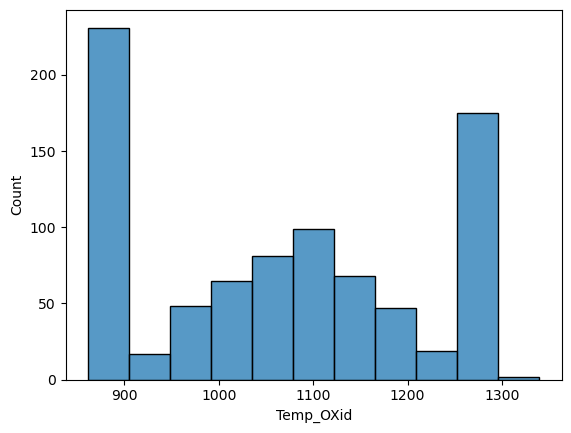

In [12]:
sns.histplot(data=df1_oxdi, x='Temp_OXid') #히스토그램

# 1100도를 중심으로 정규분포를 띄지 않음
# 900도, 1300도 인근에 데이터가 많음

<AxesSubplot:xlabel='Temp_OXid', ylabel='Count'>

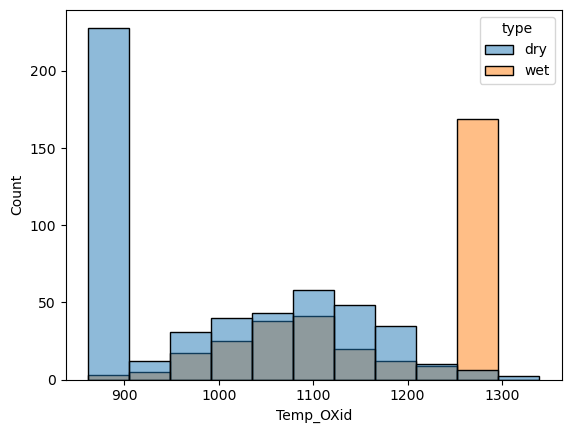

In [13]:
sns.histplot(data=df1_oxdi, x='Temp_OXid', hue='type') #층별화
# type에 따라 기준온도가 다른 것을 확인할 수 있음
# 1100도가 기준인 줄 알았더니, 그게 아니라 dry는 900도, wet은 1300도 근처가 기준이였구나.

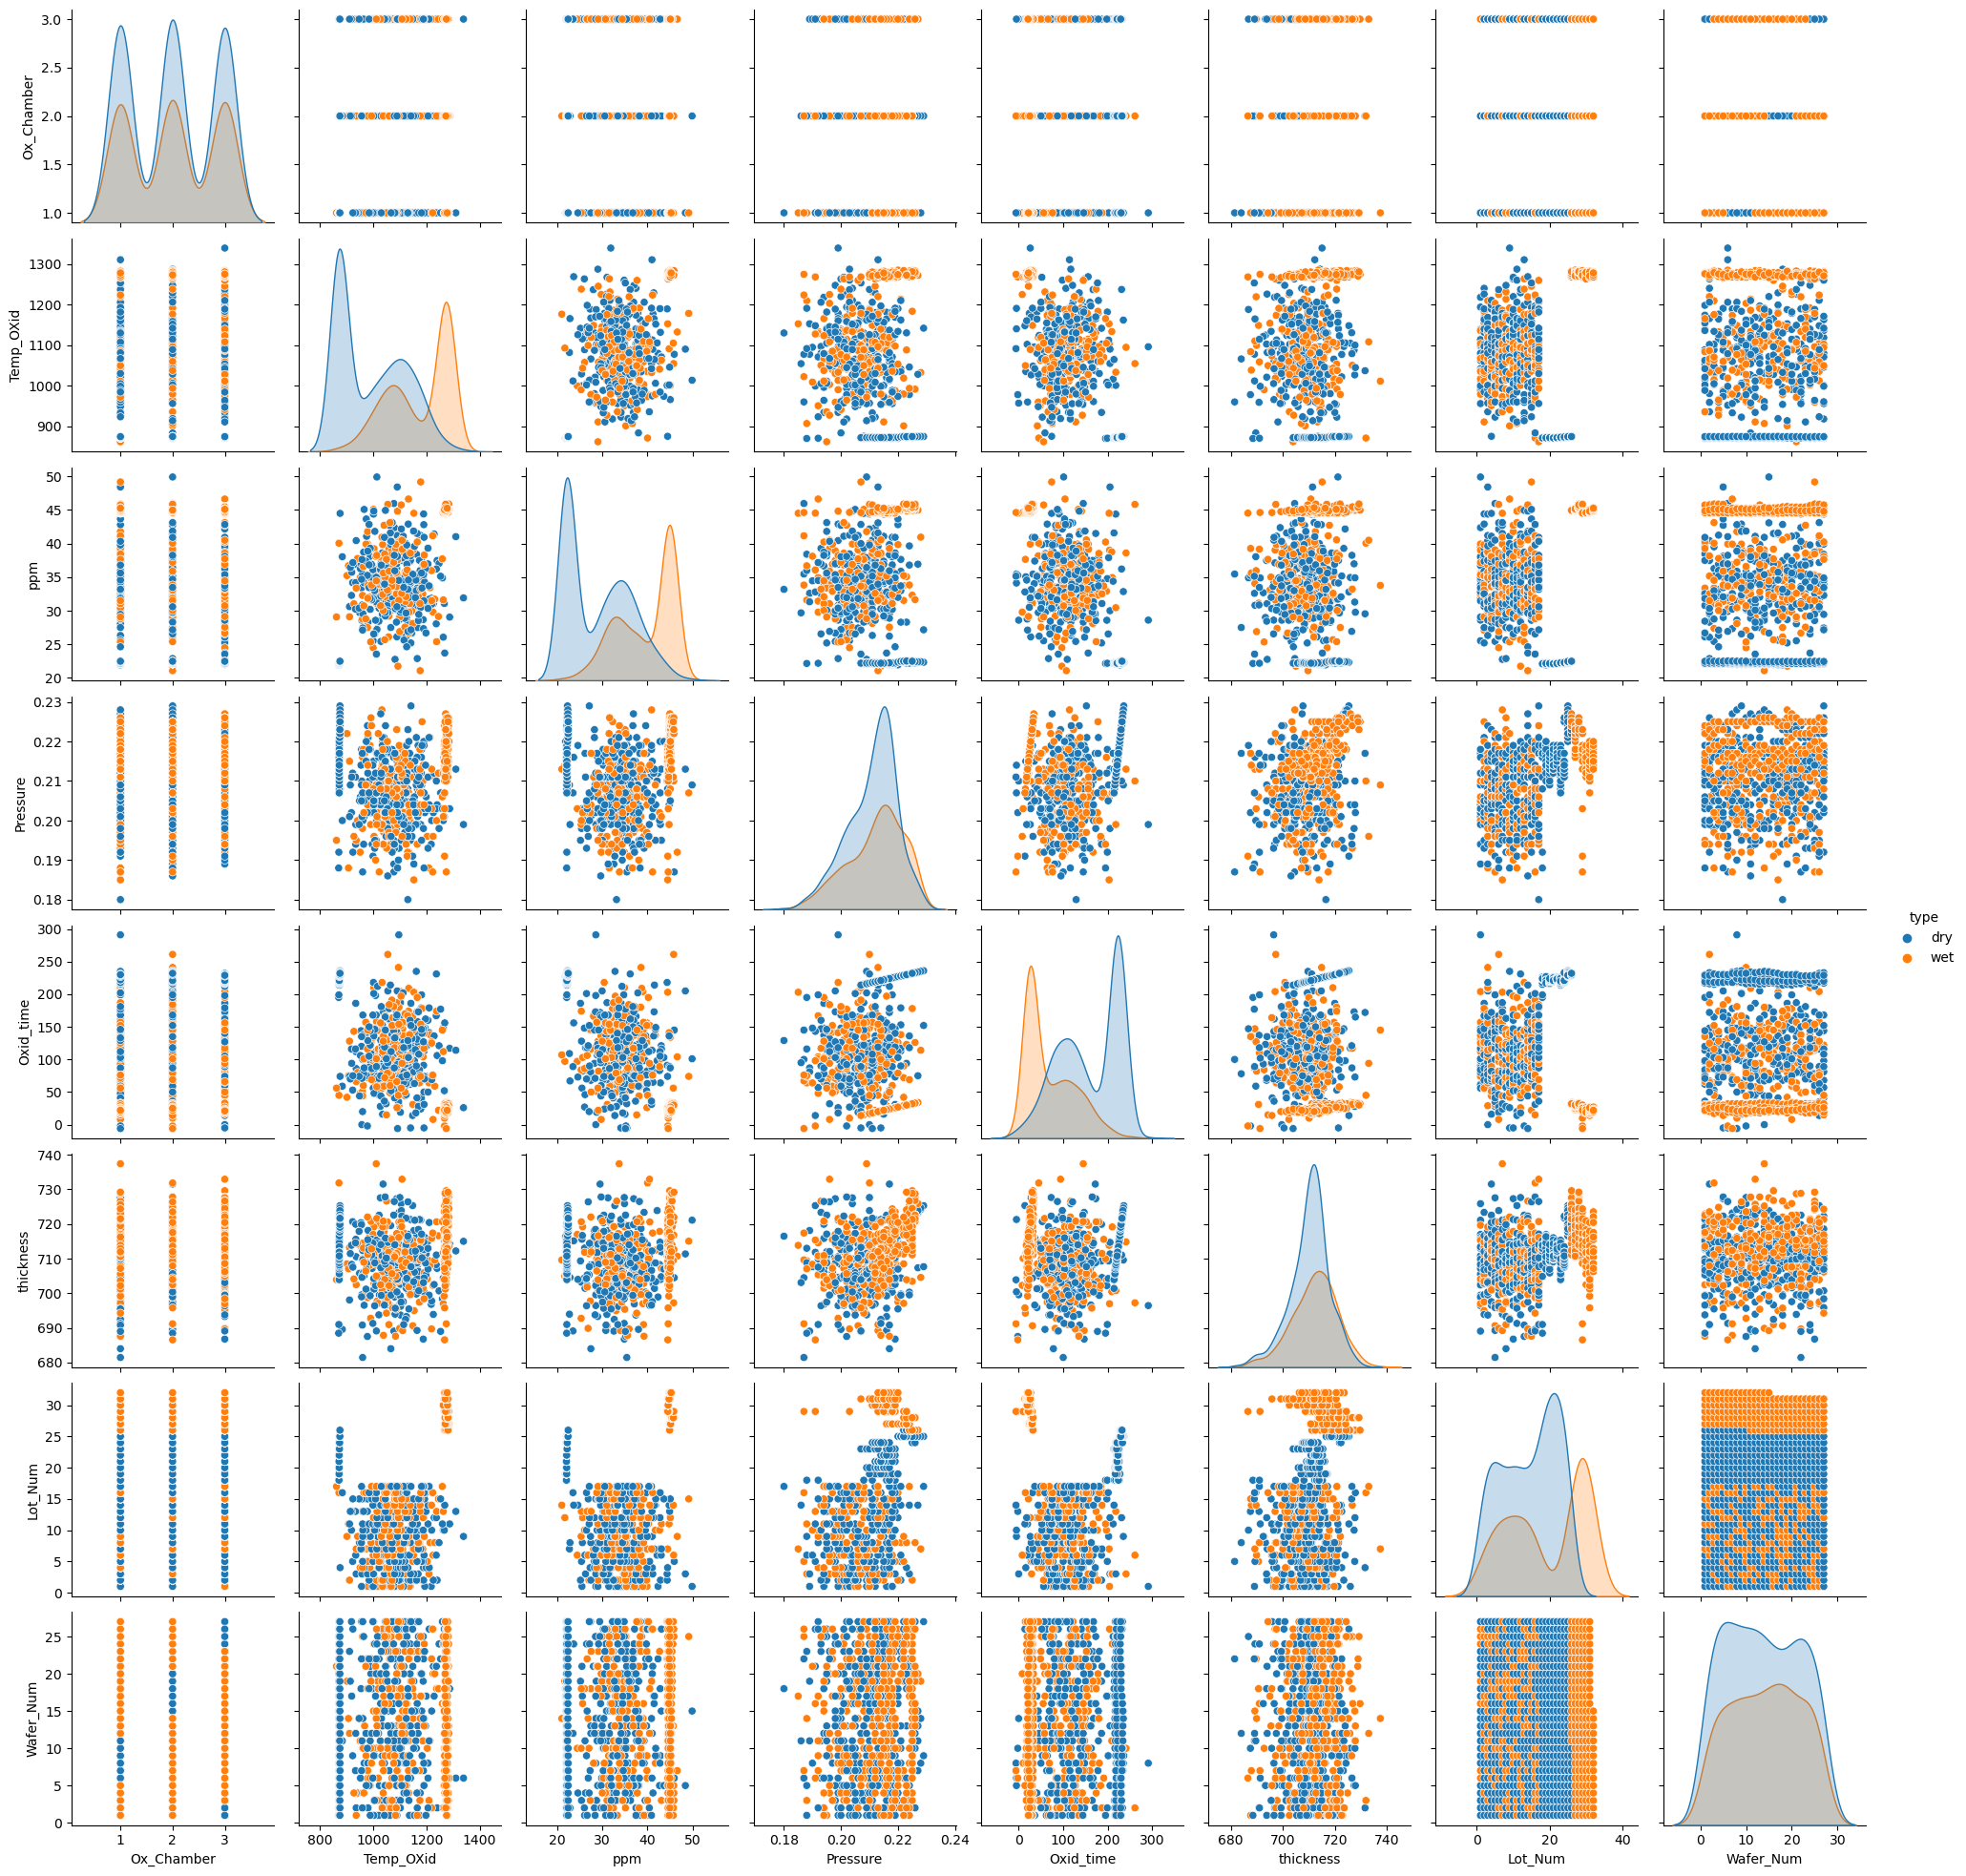

In [14]:
#모든 숫자데이터의 히스토그램과 층별화, 산점도까지 확인 가능
sns.pairplot(data = df1_oxdi, hue='type')

#이미지로 저장 가능
plt.savefig('image_oxdation.png')

In [15]:
#범주형 데이터 빈도수 확인
df1_oxdi['type'].value_counts()

dry    513
wet    339
Name: type, dtype: int64

In [16]:
df1_oxdi['Vapor'].value_counts()

O2     513
H2O    339
Name: Vapor, dtype: int64

In [17]:
df1_oxdi['Ox_Chamber'].value_counts()

2    290
1    281
3    281
Name: Ox_Chamber, dtype: int64

<AxesSubplot:xlabel='Ox_Chamber', ylabel='count'>

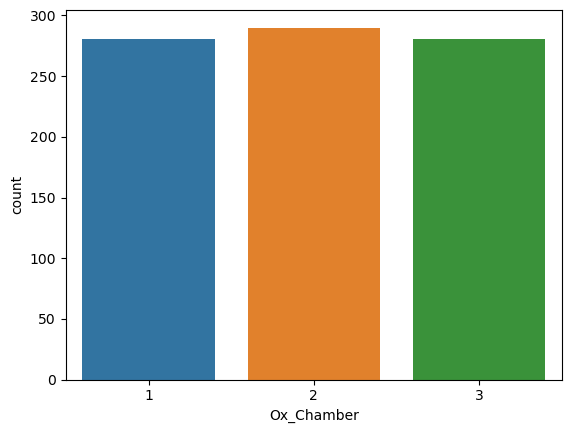

In [18]:
#문자형은 countplot을 씀
sns.countplot(data=df1_oxdi, x='Ox_Chamber')

In [19]:
#결측치 확인
df1_oxdi.isnull().sum()

Ox_Chamber    0
process       0
type          0
Temp_OXid     0
Vapor         0
ppm           0
Pressure      0
Oxid_time     0
thickness     0
No_Die        0
Lot_Num       0
Wafer_Num     0
Datetime      0
dtype: int64

# 3. 데이터 전처리

# I. 이상치 제거 Outlier

방법
1) IQR(Inter Quantile Range, 사분범위): 데이터를 오름차순으로 정렬한 뒤, 1/4씩 나누어 전체 데이터의 50%의 데이커가 몰려있는 구간을 선택
- boxplot 사용
- 25%구간(1사분위수) 또는 75%(3사분위수)에서 IQR x 1.5배 이상 떨어진 데이터를 이상치로 판단

2) 표준편차의 6배 (ESD) : 평균으로부터 각각 표준편차가 3배 떨어진 구간

3) 비즈니스 상 이상치라고 판단되는 값들

In [27]:
df1_oxid = pd.read_csv('Oxid_000.csv')
df1_etch = pd.read_csv('Etching_000.csv')

In [28]:
df1_oxid.describe()

,Ox_Chamber,Temp_OXid,ppm,Pressure,Oxid_time,thickness,Lot_Num,Wafer_Num
count,852.00000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000
mean,2.00000,1064.415784,33.202242,0.211374,123.201878,710.926810,16.281690,13.894366
std,0.81265,149.550147,8.494070,0.009067,76.285130,8.082856,9.116841,7.785951
min,1.00000,862.011276,21.070000,0.180000,-6.000000,681.435000,1.000000,1.000000
25%,1.00000,874.756813,22.450000,0.205000,52.000000,706.313000,8.000000,7.000000
50%,2.00000,1069.240209,33.420000,0.213000,116.000000,711.590500,16.000000,14.000000
75%,3.00000,1189.172249,40.452500,0.217000,217.000000,715.595000,24.000000,21.000000
max,3.00000,1339.476675,49.910000,0.229000,291.000000,737.402000,32.000000,27.000000


<AxesSubplot:xlabel='Oxid_time'>

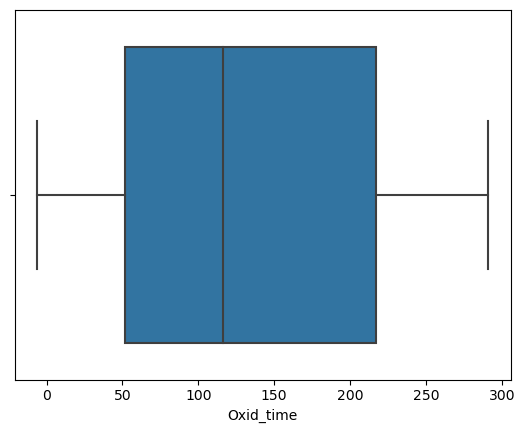

In [30]:
sns.boxplot(data=df1_oxid, x='Oxid_time')
# 아래 사각형이 IQR
# 양쪽으로 떨어진 팔이 1.5배 떨어진 구간임

## 3) 비즈니스 상 이상치라고 판단되는 값 제거 : 시간이 (-)인 항목 제거

In [32]:
cond1 = df1_oxid['Oxid_time'] < 0
df1_oxid.loc[cond1]

,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,No_Die,Lot_Num,Wafer_Num,Datetime
220,3,Oxidation,dry,1190.831353,O2,35.47,0.207,-5,700.396,NOLSM22195,9,5,17-02-2019 PM 9:04:30
248,3,Oxidation,dry,1140.375541,O2,34.12,0.214,-5,721.300,NOLSM249106,10,6,17-02-2019 PM 9:04:30
333,1,Oxidation,dry,978.149281,O2,35.26,0.202,-2,687.497,NOLSM3341310,13,10,17-02-2019 PM 9:04:30
358,1,Oxidation,dry,1091.609203,O2,35.15,0.211,-6,703.879,NOLSM359148,14,8,17-02-2019 PM 9:04:30
761,2,Oxidation,wet,1268.333781,H2O,44.53,0.191,-2,686.530,NOLSM762296,29,6,17-02-2019 PM 9:04:30
762,2,Oxidation,wet,1274.752189,H2O,44.62,0.187,-6,691.168,NOLSM763297,29,7,17-02-2019 PM 9:04:30


In [35]:
# Oxid_time 복제열 만들기 (원본을 유지하자)
df1_oxid['Oxid_time(outlier)'] = df1_oxid['Oxid_time']

# Oxid_time이 0보다 작은 값을 가져와서 원하는 컬럼의 값을 nan으로 넣어줄 수 있다.
cond1 = df1_oxid['Oxid_time(outlier)'] < 0
df1_oxid.loc[cond1,'Oxid_time(outlier)'] = np.nan

In [37]:
cond1 = df1_oxid['Oxid_time'] < 0
df1_oxid.loc[cond1]

,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,No_Die,Lot_Num,Wafer_Num,Datetime,Oxid_time(outlier)
220,3,Oxidation,dry,1190.831353,O2,35.47,0.207,-5,700.396,NOLSM22195,9,5,17-02-2019 PM 9:04:30,NaN
248,3,Oxidation,dry,1140.375541,O2,34.12,0.214,-5,721.300,NOLSM249106,10,6,17-02-2019 PM 9:04:30,NaN
333,1,Oxidation,dry,978.149281,O2,35.26,0.202,-2,687.497,NOLSM3341310,13,10,17-02-2019 PM 9:04:30,NaN
358,1,Oxidation,dry,1091.609203,O2,35.15,0.211,-6,703.879,NOLSM359148,14,8,17-02-2019 PM 9:04:30,NaN
761,2,Oxidation,wet,1268.333781,H2O,44.53,0.191,-2,686.530,NOLSM762296,29,6,17-02-2019 PM 9:04:30,NaN
762,2,Oxidation,wet,1274.752189,H2O,44.62,0.187,-6,691.168,NOLSM763297,29,7,17-02-2019 PM 9:04:30,NaN


In [38]:
df1_oxid.describe()

,Ox_Chamber,Temp_OXid,ppm,Pressure,Oxid_time,thickness,Lot_Num,Wafer_Num,Oxid_time(outlier)
count,852.00000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,846.000000
mean,2.00000,1064.415784,33.202242,0.211374,123.201878,710.926810,16.281690,13.894366,124.106383
std,0.81265,149.550147,8.494070,0.009067,76.285130,8.082856,9.116841,7.785951,75.791886
min,1.00000,862.011276,21.070000,0.180000,-6.000000,681.435000,1.000000,1.000000,0.000000
25%,1.00000,874.756813,22.450000,0.205000,52.000000,706.313000,8.000000,7.000000,56.000000
50%,2.00000,1069.240209,33.420000,0.213000,116.000000,711.590500,16.000000,14.000000,116.500000
75%,3.00000,1189.172249,40.452500,0.217000,217.000000,715.595000,24.000000,21.000000,217.750000
max,3.00000,1339.476675,49.910000,0.229000,291.000000,737.402000,32.000000,27.000000,291.000000


## 1) IQR(Inter Quantile Range, 사분범위)

In [40]:
# 25%에 해당하는 구간
df1_oxid['Oxid_time(outlier)'].quantile(0.25)

56.0

In [41]:
# 75%에 해당하는 구간
df1_oxid['Oxid_time(outlier)'].quantile(0.75)

217.75

In [44]:
q3 = df1_oxid['Oxid_time(outlier)'].quantile(0.75)
q1 = df1_oxid['Oxid_time(outlier)'].quantile(0.25)
iqr = (q3 - q1) * 1.5

In [51]:
# iqr 1.5배 이상의 값 = 이상치
cond1 = df1_oxid['Oxid_time(outlier)'] > (q3 + iqr)
# iqr 1.5배 이하의 값 = 이상치
cond2 = df1_oxid['Oxid_time(outlier)'] < (q1 - iqr)

df1_oxid.loc[cond1 | cond2, 'Oxid_time(outlier)'] = np.nan

In [45]:
iqr

242.625

In [46]:
q3 + iqr

460.375

In [47]:
q1 - iqr

-186.625

<AxesSubplot:xlabel='Oxid_time(outlier)'>

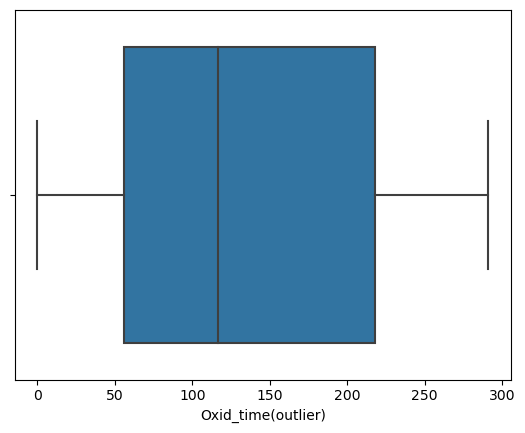

In [49]:
sns.boxplot(data=df1_oxid, x='Oxid_time(outlier)')

- using etch data

In [54]:
df1_etch.describe()

,Unnamed: 0,Etching_Chamber,Temp_Etching,Source_Power,Selectivity,Lot_Num,Wafer_Num,Thin Film 4,Thin Film 3,Thin Film 2,Thin Film 1
count,852.00000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,851.000000,851.000000,851.000000,851.000000
mean,425.50000,1.967136,71.147822,51.227459,1.032140,16.281690,13.894366,296.633373,311.276439,347.799401,404.940012
std,246.09551,0.830584,0.824158,0.634215,0.016238,9.116841,7.785951,125.378446,125.714630,125.774630,125.790535
min,0.00000,1.000000,68.150000,49.342000,0.984000,1.000000,1.000000,-49.000000,-34.650000,2.000000,59.380000
25%,212.75000,1.000000,70.709750,50.794500,1.022000,8.000000,7.000000,202.000000,216.525000,252.880000,310.185000
50%,425.50000,2.000000,71.220500,51.247000,1.033500,16.000000,14.000000,281.000000,295.970000,332.480000,389.630000
75%,638.25000,3.000000,71.656500,51.698250,1.043000,24.000000,21.000000,372.000000,386.675000,423.050000,480.355000
max,851.00000,3.000000,73.081000,53.272000,1.076000,32.000000,27.000000,687.000000,700.240000,736.510000,793.500000


In [55]:
# 열 복제
df1_etch['Thin Film 4(outlier)'] = df1_etch['Thin Film 4']
df1_etch['Thin Film 3(outlier)'] = df1_etch['Thin Film 3']

# 0보다 작은 값
cond1 = df1_etch['Thin Film 4(outlier)'] < 0
cond2 = df1_etch['Thin Film 3(outlier)'] < 0

In [60]:
# 이상치를 nan으로 변경
df1_etch.loc[cond1, 'Thin Film 4(outlier)'] = np.nan
df1_etch.loc[cond2, 'Thin Film 3(outlier)'] = np.nan

In [64]:
df1_etch.describe()

,Unnamed: 0,Etching_Chamber,Temp_Etching,Source_Power,Selectivity,Lot_Num,Wafer_Num,Thin Film 4,Thin Film 3,Thin Film 2,Thin Film 1,Thin Film 4(outlier),Thin Film 3(outlier)
count,852.00000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,851.000000,851.000000,851.000000,851.000000,848.000000,848.000000
mean,425.50000,1.967136,71.147822,51.227459,1.032140,16.281690,13.894366,296.633373,311.276439,347.799401,404.940012,297.814858,312.458125
std,246.09551,0.830584,0.824158,0.634215,0.016238,9.116841,7.785951,125.378446,125.714630,125.774630,125.790535,124.009359,124.349720
min,0.00000,1.000000,68.150000,49.342000,0.984000,1.000000,1.000000,-49.000000,-34.650000,2.000000,59.380000,13.000000,27.170000
25%,212.75000,1.000000,70.709750,50.794500,1.022000,8.000000,7.000000,202.000000,216.525000,252.880000,310.185000,203.000000,217.532500
50%,425.50000,2.000000,71.220500,51.247000,1.033500,16.000000,14.000000,281.000000,295.970000,332.480000,389.630000,282.000000,296.695000
75%,638.25000,3.000000,71.656500,51.698250,1.043000,24.000000,21.000000,372.000000,386.675000,423.050000,480.355000,372.250000,387.002500
max,851.00000,3.000000,73.081000,53.272000,1.076000,32.000000,27.000000,687.000000,700.240000,736.510000,793.500000,687.000000,700.240000


## 2) 표준편차의 6배 (ESD) : 평균으로부터 각각 표준편차가 3배 떨어진 구간

In [67]:
esd = (df1_etch['Thin Film 4(outlier)'].std())*3

In [69]:
upper_esd = df1_etch['Thin Film 4(outlier)'].mean() + esd
lower_esd = df1_etch['Thin Film 4(outlier)'].mean() - esd

In [73]:
cond1 = df1_etch['Thin Film 4(outlier)'] > upper_esd
cond2 = df1_etch['Thin Film 4(outlier)'] < lower_esd

df1_etch.loc[cond1 | cond2, 'Thin Film 4(outlier)'] = np.nan

# II. 파생변수

- 기존의 변수의 계산식을 넣거나 특정 조건에 따라 새로 데이터를 분류해 새로운 항목으로 만든 값

In [78]:
# 두께가 700mm가 안되는 항목은 '보강' / 이상이면 '정상' 으로 라벨링
# 숫자형 데이터가 문자형 데이터로 바뀜
cond1 = df1_oxid['thickness'] < 700
df1_oxid.loc[cond1, 'reinfor'] = 'reinfor'
df1_oxid.loc[~cond1, 'reinfor'] = 'normal'

In [80]:
df1_oxid['reinfor'].value_counts()

normal     770
reinfor     82
Name: reinfor, dtype: int64

In [84]:
# pivot table: 보강이 필요한 항목과 정상인 항목은 oxid time이 20초정도 차이난다는 것을 확인할 수 있다.
# CDA단계로 넘어가서 실제 수치적 차이가 유의미한지 검증 진행
df1_oxid.pivot_table(index='reinfor', values=['Oxid_time', 'Pressure', 'ppm','Temp_OXid'])

,Oxid_time,Pressure,Temp_OXid,ppm
reinfor,,,,
normal,125.045455,0.211891,1062.494658,33.107623
reinfor,105.890244,0.206524,1082.455629,34.090732


In [85]:
df1_litho = pd.read_csv('Photo_lithography_000.csv')
df1_litho

,lithography_Chamber,Line_CD,Lamp,UV_type,Wavelength,Resolution,Energy_Exposure,No_Die,Lot_Num,Wafer_Num,Datetime
0,1,30.959,Hg-Arc,H,405,516.657,109.769,NOLSM111,1,1,17-02-2019 PM 9:04:30
1,2,29.653,Hg-Arc,H,405,501.894,107.102,NOLSM212,1,2,17-02-2019 PM 9:04:30
2,3,28.063,Hg-Arc,I,365,506.750,110.471,NOLSM313,1,3,17-02-2019 PM 9:04:30
3,1,31.556,Hg-Arc,I,365,537.603,107.072,NOLSM414,1,4,17-02-2019 PM 9:04:30
4,2,31.969,Hg-Arc,I,365,560.574,108.073,NOLSM515,1,5,17-02-2019 PM 9:04:30
...,...,...,...,...,...,...,...,...,...,...,...
847,3,32.525,Hg-Arc,I,365,468.930,106.744,NOLSM8483211,32,11,17-02-2019 PM 9:04:30
848,1,28.001,Hg-Arc,I,365,469.586,106.174,NOLSM8493212,32,12,17-02-2019 PM 9:04:30
849,2,32.110,Hg-Arc,I,365,476.399,106.108,NOLSM8503213,32,13,17-02-2019 PM 9:04:30
850,3,35.822,Hg-Arc,I,365,476.997,106.765,NOLSM8513214,32,14,17-02-2019 PM 9:04:30


In [86]:
cond1 = df1_litho['Line_CD'] < 25
cond2 = df1_litho['Line_CD'] > 55

df1_litho.loc[cond1 | cond2, 'Range_check'] = 'check'
df1_litho.loc[~(cond1 | cond2), 'Range_check'] = 'normal'

In [88]:
df1_litho['Range_check'].value_counts()

normal    666
check     186
Name: Range_check, dtype: int64

In [89]:
df1_litho.pivot_table(index='Range_check')

,Energy_Exposure,Line_CD,Lot_Num,Resolution,Wafer_Num,Wavelength,lithography_Chamber
Range_check,,,,,,,
check,107.706484,44.373554,17.602151,512.906511,13.543011,402.177419,2.005376
normal,108.195538,39.816949,15.912913,517.135746,13.992492,405.055556,2.010511


## etching rate와 target의 상관성 확인

1. Etching rate 파생변수 만들기

In [91]:
df1_etch = pd.read_csv('Etching_000.csv')
df1_etch

,Unnamed: 0,Etching_Chamber,Process 3,Temp_Etching,Source_Power,Selectivity,No_Die,Lot_Num,Wafer_Num,Datetime,Thin Film 4,Thin Film 3,Thin Film 2,Thin Film 1
0,0,3,Etching,70.878,50.851,1.047,NOLSM111,1,1,17-02-2019 PM 9:04:30,251.0,267.06,303.82,361.38
1,1,2,Etching,69.561,52.283,1.051,NOLSM212,1,2,17-02-2019 PM 9:04:30,317.0,332.74,369.31,426.11
2,2,1,Etching,70.968,51.610,1.017,NOLSM313,1,3,17-02-2019 PM 9:04:30,411.0,424.21,460.65,517.80
3,3,1,Etching,70.146,51.286,1.027,NOLSM414,1,4,17-02-2019 PM 9:04:30,256.0,272.28,308.56,365.93
4,4,2,Etching,71.174,51.996,1.050,NOLSM515,1,5,17-02-2019 PM 9:04:30,419.0,434.98,471.65,528.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,847,3,Etching,71.550,50.601,1.015,NOLSM8483211,32,11,17-02-2019 PM 9:04:30,177.0,192.10,228.65,285.91
848,848,3,Etching,70.718,50.424,1.011,NOLSM8493212,32,12,17-02-2019 PM 9:04:30,180.0,194.33,230.76,287.66
849,849,2,Etching,71.295,50.602,1.015,NOLSM8503213,32,13,17-02-2019 PM 9:04:30,142.0,156.72,193.21,250.21
850,850,1,Etching,71.199,50.544,1.014,NOLSM8513214,32,14,17-02-2019 PM 9:04:30,127.0,140.41,176.87,234.09


In [94]:
# 분당 몇 나노m씩 깎여나갔는지 확인가능
df1_etch['etch_rate'] = (df1_etch['Thin Film 1'] - df1_etch['Thin Film 4']) / 40

# III. 결측치 처리

- 제거: 결측치가 있는 행을 모두 제거하기 (결측치가 많은 경우에는 위험)
- 대치: 평균 / 중앙값과 같은 대표값으로 대치
<br> 알고리즘을 이용해, 주변 row값을 참고하여 대치

In [95]:
df1_etch = pd.read_csv('Etching_000.csv')

In [98]:
cond1 = df1_etch['Thin Film 3'] < 0

df1_etch['Thin Film 3(outlier)'] = df1_etch['Thin Film 3']
df1_etch.loc[cond1, 'Thin Film 3(outlier)'] = np.nan

In [101]:
cond1 = df1_etch['Thin Film 4'] < 0

df1_etch['Thin Film 4(outlier)'] = df1_etch['Thin Film 4']
df1_etch.loc[cond1, 'Thin Film 4(outlier)'] = np.nan

In [102]:
df1_etch.isnull().sum()

Unnamed: 0              0
Etching_Chamber         0
Process 3               0
Temp_Etching            0
Source_Power            0
Selectivity             0
No_Die                  0
Lot_Num                 0
Wafer_Num               0
Datetime                0
Thin Film 4             1
Thin Film 3             1
Thin Film 2             1
Thin Film 1             1
Thin Film 3(outlier)    4
Thin Film 4(outlier)    4
dtype: int64

In [105]:
cond1 = df1_etch['Thin Film 4(outlier)'].isnull()
df1_etch.loc[cond1]

,Unnamed: 0,Etching_Chamber,Process 3,Temp_Etching,Source_Power,Selectivity,No_Die,Lot_Num,Wafer_Num,Datetime,Thin Film 4,Thin Film 3,Thin Film 2,Thin Film 1,Thin Film 3(outlier),Thin Film 4(outlier)
211,211,2,Etching,69.897,50.484,1.023,NOLSM212823,8,23,17-02-2019 PM 9:04:30,-49.0,-34.65,2.00,59.38,NaN,NaN
332,332,2,Etching,70.060,51.141,1.047,NOLSM333139,13,9,17-02-2019 PM 9:04:30,-45.0,-30.86,5.55,62.86,NaN,NaN
376,376,2,Etching,70.794,50.944,1.026,NOLSM3771426,14,26,17-02-2019 PM 9:04:30,-18.0,-2.73,34.28,91.30,NaN,NaN
702,702,2,Etching,72.289,51.790,1.045,NOLSM703271,27,1,17-02-2019 PM 9:04:30,NaN,NaN,NaN,NaN,NaN,NaN


## 제거 dropna
- 분석 가능하도록 결측치를 깔끔히 제거 후 분석작업 진행

In [107]:
df1_etch2 = df1_etch.dropna()
df1_etch2.isnull().sum()

Unnamed: 0              0
Etching_Chamber         0
Process 3               0
Temp_Etching            0
Source_Power            0
Selectivity             0
No_Die                  0
Lot_Num                 0
Wafer_Num               0
Datetime                0
Thin Film 4             0
Thin Film 3             0
Thin Film 2             0
Thin Film 1             0
Thin Film 3(outlier)    0
Thin Film 4(outlier)    0
dtype: int64

## 대치 fillna

In [116]:
df1_etch['Thin Film 4(missing)'] = df1_etch['Thin Film 4(outlier)']\
.fillna(df1_etch['Thin Film 4(outlier)'].mean())

In [115]:
cond1 = df1_etch['Thin Film 4(outlier)'].isnull()
df1_etch.loc[cond1]

,Unnamed: 0,Etching_Chamber,Process 3,Temp_Etching,Source_Power,Selectivity,No_Die,Lot_Num,Wafer_Num,Datetime,Thin Film 4,Thin Film 3,Thin Film 2,Thin Film 1,Thin Film 3(outlier),Thin Film 4(outlier),Thin Film 4(missing)
211,211,2,Etching,69.897,50.484,1.023,NOLSM212823,8,23,17-02-2019 PM 9:04:30,-49.0,-34.65,2.00,59.38,NaN,NaN,297.814858
332,332,2,Etching,70.060,51.141,1.047,NOLSM333139,13,9,17-02-2019 PM 9:04:30,-45.0,-30.86,5.55,62.86,NaN,NaN,297.814858
376,376,2,Etching,70.794,50.944,1.026,NOLSM3771426,14,26,17-02-2019 PM 9:04:30,-18.0,-2.73,34.28,91.30,NaN,NaN,297.814858
702,702,2,Etching,72.289,51.790,1.045,NOLSM703271,27,1,17-02-2019 PM 9:04:30,NaN,NaN,NaN,NaN,NaN,NaN,297.814858


<AxesSubplot:xlabel='Thin Film 4(outlier)', ylabel='Count'>

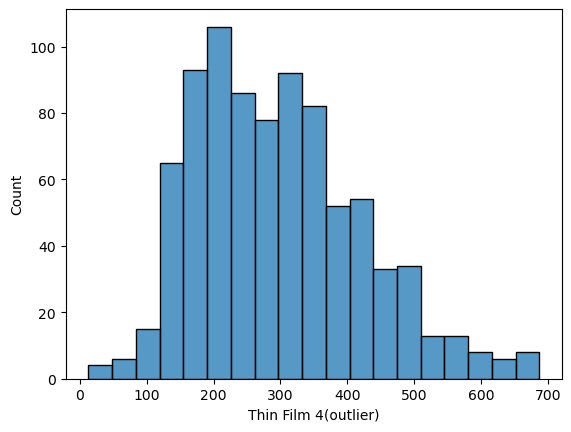

In [117]:
sns.histplot(data=df1_etch, x='Thin Film 4(outlier)')

# 4. 데이터 통합

- 데이터 병합: 공통된 항목을 기준으로 병합을 실시 (key column ex.No_Die)
    - Inner join : key column에서 공통된 값들만 가져와서 병합
    - Outer join : key column에 존재하는 모든 항목에 대해 병합
    - Left / Right join : 특정 테이블 기준으로 병합

In [119]:
df1_oxid = pd.read_csv('Oxid_000.csv')
df1_soft = pd.read_csv('Photo_Softbake_000.csv')
df1_litho = pd.read_csv('Photo_lithography_000.csv')
df1_etch = pd.read_csv('Etching_000.csv')
df1_ion = pd.read_csv('Implant_000.csv')
df1_target = pd.read_csv('Inspect_000.csv')

In [120]:
df1_oxid.columns

Index(['Ox_Chamber', 'process', 'type', 'Temp_OXid', 'Vapor', 'ppm',
       'Pressure', 'Oxid_time', 'thickness', 'No_Die', 'Lot_Num', 'Wafer_Num',
       'Datetime'],
      dtype='object')

In [121]:
df1_soft.columns

Index(['Unnamed: 0', 'photo_soft_Chamber', 'process 2', 'resist_target',
       'N2_HMDS', 'pressure_HMDS', 'temp_HMDS', 'temp_HMDS_bake',
       'time_HMDS_bake', 'spin1', 'spin2', 'spin3', 'photoresist_bake',
       'temp_softbake', 'time_softbake', 'No_Die', 'Lot_Num', 'Wafer_Num',
       'Datetime'],
      dtype='object')

In [124]:
m1 = pd.merge(df1_oxid, df1_soft, on='No_Die', how='inner')
m2 = pd.merge(m1, df1_litho, on='No_Die', how='inner')
m3 = pd.merge(m2, df1_etch, on='No_Die', how='inner')
m4 = pd.merge(m3, df1_ion, on='No_Die', how='inner')
m5 = pd.merge(m4, df1_target, on='No_Die', how='inner')

/var/folders/d8/w7xv85nx7rz8bhk14mgwb7wm0000gn/T/ipykernel_89372/128750511.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Datetime_x', 'Lot_Num_x', 'Wafer_Num_x'} in the result is deprecated and will raise a MergeError in a future version.
  m3 = pd.merge(m2, df1_etch, on='No_Die', how='inner')
/var/folders/d8/w7xv85nx7rz8bhk14mgwb7wm0000gn/T/ipykernel_89372/128750511.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Datetime_x', 'Lot_Num_x', 'Wafer_Num_x'} in the result is deprecated and will raise a MergeError in a future version.
  m5 = pd.merge(m4, df1_target, on='No_Die', how='inner')


In [127]:
# 불필요한 컬럼들을 제거
m5.columns

Index(['Ox_Chamber', 'process', 'type', 'Temp_OXid', 'Vapor', 'ppm',
       'Pressure', 'Oxid_time', 'thickness', 'No_Die', 'Lot_Num_x',
       'Wafer_Num_x', 'Datetime_x', 'Unnamed: 0_x', 'photo_soft_Chamber',
       'process 2', 'resist_target', 'N2_HMDS', 'pressure_HMDS', 'temp_HMDS',
       'temp_HMDS_bake', 'time_HMDS_bake', 'spin1', 'spin2', 'spin3',
       'photoresist_bake', 'temp_softbake', 'time_softbake', 'Lot_Num_y',
       'Wafer_Num_y', 'Datetime_y', 'lithography_Chamber', 'Line_CD', 'Lamp',
       'UV_type', 'Wavelength', 'Resolution', 'Energy_Exposure', 'Lot_Num_x',
       'Wafer_Num_x', 'Datetime_x', 'Unnamed: 0_y', 'Etching_Chamber',
       'Process 3', 'Temp_Etching', 'Source_Power', 'Selectivity', 'Lot_Num_y',
       'Wafer_Num_y', 'Datetime_y', 'Thin Film 4', 'Thin Film 3',
       'Thin Film 2', 'Thin Film 1', 'Chamber_Num', 'process4', 'Flux60s',
       'Flux90s', 'Flux160s', 'Flux480s', 'Flux840s', 'input_Energy',
       'Current', 'Temp_implantation', 'Furance_T

In [129]:
df1 = m5.drop(columns=['Lot_Num_x','Wafer_Num_x', 'Datetime_x', 'Unnamed: 0_x',
                 'Lot_Num_y','Wafer_Num_y', 'Datetime_y', 'Unnamed: 0_y'])

In [130]:
df1.columns

Index(['Ox_Chamber', 'process', 'type', 'Temp_OXid', 'Vapor', 'ppm',
       'Pressure', 'Oxid_time', 'thickness', 'No_Die', 'photo_soft_Chamber',
       'process 2', 'resist_target', 'N2_HMDS', 'pressure_HMDS', 'temp_HMDS',
       'temp_HMDS_bake', 'time_HMDS_bake', 'spin1', 'spin2', 'spin3',
       'photoresist_bake', 'temp_softbake', 'time_softbake',
       'lithography_Chamber', 'Line_CD', 'Lamp', 'UV_type', 'Wavelength',
       'Resolution', 'Energy_Exposure', 'Etching_Chamber', 'Process 3',
       'Temp_Etching', 'Source_Power', 'Selectivity', 'Thin Film 4',
       'Thin Film 3', 'Thin Film 2', 'Thin Film 1', 'Chamber_Num', 'process4',
       'Flux60s', 'Flux90s', 'Flux160s', 'Flux480s', 'Flux840s',
       'input_Energy', 'Current', 'Temp_implantation', 'Furance_Temp',
       'RTA_Temp', 'Target', 'Error_message', 'Wafer_map'],
      dtype='object')

In [134]:
# 어떤 챔버를 타고 흘러갔는지 확인하기 위한 작업. data type을 str로 변경
# 각 챔버별 부하를 확인하기 위한 작업, 정말 부하가 걸릴까?
df1['Chamber_route'] = 'route' + df1['Ox_Chamber'].astype(str) + \
                                df1['photo_soft_Chamber'].astype(str) + \
                                df1['lithography_Chamber'].astype(str) + \
                                df1['Etching_Chamber'].astype(str) + \
                                df1['Chamber_Num'].astype(str)

In [139]:
df1['Chamber_route'].value_counts()

route32222    34
route23222    34
route22222    34
route13222    31
route21222    30
route11222    29
route31222    26
route33222    25
route12222    21
route11133    18
route11311    18
route12111    18
route11111    17
route21311    17
route12311    17
route13111    17
route13333    17
route21133    17
route22111    17
route11333    17
route22333    17
route23311    17
route31111    17
route31333    17
route32133    17
route32311    17
route12133    17
route33111    17
route33311    17
route33133    17
route33333    17
route32111    17
route31311    17
route12333    17
route31133    17
route23333    17
route13311    17
route23111    17
route22311    17
route21111    17
route21333    16
route22133    12
route23133    11
route13133    10
route32333     9
Name: Chamber_route, dtype: int64

In [141]:
df1.isnull().sum()

Ox_Chamber             0
process                0
type                   0
Temp_OXid              0
Vapor                  0
ppm                    0
Pressure               0
Oxid_time              0
thickness              0
No_Die                 0
photo_soft_Chamber     0
process 2              0
resist_target          0
N2_HMDS                0
pressure_HMDS          0
temp_HMDS              0
temp_HMDS_bake         0
time_HMDS_bake         0
spin1                  0
spin2                  0
spin3                  0
photoresist_bake       0
temp_softbake          0
time_softbake          0
lithography_Chamber    0
Line_CD                1
Lamp                   0
UV_type                0
Wavelength             0
Resolution             1
Energy_Exposure        1
Etching_Chamber        0
Process 3              0
Temp_Etching           0
Source_Power           0
Selectivity            0
Thin Film 4            1
Thin Film 3            1
Thin Film 2            1
Thin Film 1            1
